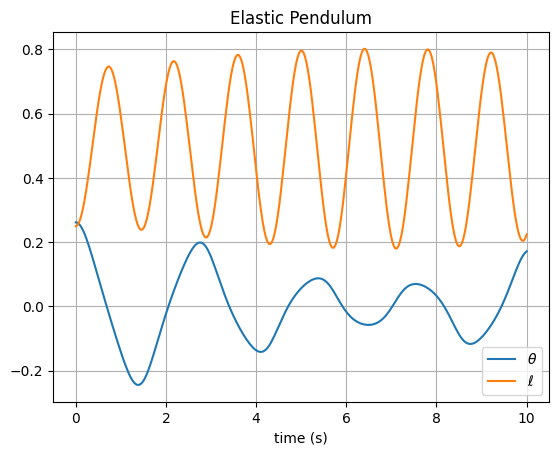

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Simulate the Spring Pendulum ####
# assign constants
g = 9.81
k = 20
m = 1
ell_0 = 1 # resting length of spring

# initial conditions
x0 = np.array([np.deg2rad(15), 0, 0.25, 0])

# our system of differential equations
# see "derivation.ipynb" for details
def spring_mass_ODE(t, y):
    theta = y[0]
    theta_dot = y[1]
    ell = y[2]
    ell_dot = y[3]

    return (
        theta_dot,
        (-2.0*ell_dot*theta_dot - g*np.sin(theta))/(ell + ell_0),
        ell_dot,
        -ell*k/m + ell*theta_dot**2 + ell_0*theta_dot**2 + g*np.cos(theta),
    )

# solve the ODE, evaluate at 30 fps
sol = solve_ivp(spring_mass_ODE, [0, 10], x0, 
    t_eval=np.linspace(0,10,10*30))

# output of the solver
theta = sol.y[0]
ell = sol.y[2]
t = sol.t

# plot theta and ell over time
plt.plot(t, theta, label="$\\theta$")
plt.plot(t, ell, label="$\\ell$")
plt.legend()
plt.grid()
plt.xlabel("time (s)")
plt.title('Elastic Pendulum')
plt.show()

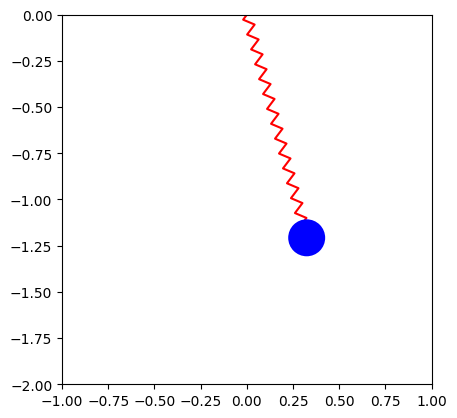

In [2]:
# create an image of the pendulum at a particular state
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-2, 0)

def generate_spring(n):
    # The spring has a width of 2/(2n) and a height of 1
    # data contains the x and y coordinates of the spring's vertices
    # data = np.array([[x0 x1 x2 x3 x4 ... x_n x_n+1],
    #                  [y0 y1 y2 y4 y5 ... y_n y_n+1]])
    # where (x0,y0) = (0,0) and (x_n+1,y_n+1) = (0,-1)
    data = np.zeros((2,n+2)) 
    data[:,-1] = [0,-1]
    for i in range(1,n+1):
        data[0,i] = -1/(2*n) if i % 2 else 1/(2*n)
        data[1,i] = -(2*i-1)/(2*n)
    return data

theta = np.deg2rad(15)
ell = 0.25
ell_0 = 1
spring_length = ell + ell_0

# mass position
px = spring_length * np.sin(theta) 
py = -spring_length * np.cos(theta)
circle = ax.add_patch(plt.Circle( (px,py), 0.1, fc='b', zorder=3))

# spring
A = Affine2D().scale(2/spring_length, spring_length).rotate(theta).get_matrix()
# note: we had to append [1 1 1 1 1 ... 1] to data to allow for matrix multiplication (affine transformation)
data = ell_0*np.append(generate_spring(30), np.ones((1,30+2)), axis=0)
data_new = A @ data
spring = Line2D(data_new[0,:], data_new[1,:], color='r')
ax.add_line(spring)

plt.savefig('elastic_pendulum.png')

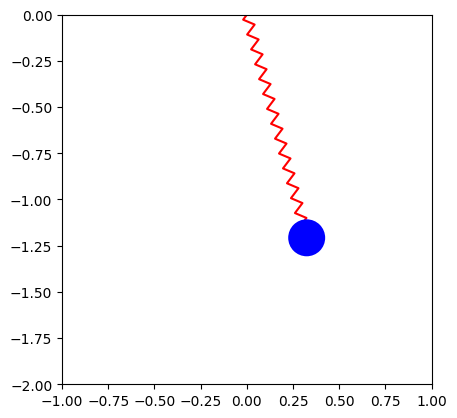

In [3]:
# Animate the spring pendulum
import matplotlib.animation as animation

# output of the solver
theta = sol.y[0]
ell = sol.y[2]
t = sol.t

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-2, 0)

ell_0 = 1

data = ell_0*np.append(generate_spring(30), np.ones((1,30+2)), axis=0)
spring = Line2D(data[0,:], data[1,:], color='r')
circle = ax.add_patch(plt.Circle( (0,0), 0.1, fc='b', zorder=3)) # doesn't matter where we put it
ax.add_line(spring)

# animate each frame "i"
def animate(i):

    # mass position
    spring_length = (ell_0+ell[i])
    px = spring_length* np.sin(theta[i])
    py = -spring_length * np.cos(theta[i])
    circle.set_center((px, py))
    
    # spring
    A = Affine2D().scale(2/spring_length, spring_length).rotate(theta[i]).get_matrix()
    data_new = A @ data
    spring.set_data(data_new[0,:], data_new[1,:])

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('elastic_pendulum.gif', writer=ffmpeg_writer)